In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D , Flatten , Dense , MaxPooling2D
import cv2
from matplotlib import pyplot as plt
import random

In [2]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 342 files belonging to 2 classes.


In [3]:
batch = data.as_numpy_iterator().next()

In [4]:
data = data.map(lambda x,y : (x/255 , y))

In [5]:
batch[0]

array([[[[7.60000000e+01, 1.31000000e+02, 1.98000000e+02],
         [7.58281250e+01, 1.30828125e+02, 1.97828125e+02],
         [7.50468750e+01, 1.30046875e+02, 1.97046875e+02],
         ...,
         [1.81000000e+02, 2.28000000e+02, 2.54000000e+02],
         [1.81000000e+02, 2.28000000e+02, 2.54000000e+02],
         [1.81000000e+02, 2.28000000e+02, 2.54000000e+02]],

        [[7.62578125e+01, 1.31257812e+02, 1.98257812e+02],
         [7.60785522e+01, 1.31078552e+02, 1.98078552e+02],
         [7.52637329e+01, 1.30263733e+02, 1.97263733e+02],
         ...,
         [1.81085938e+02, 2.28085938e+02, 2.54085938e+02],
         [1.81085938e+02, 2.28085938e+02, 2.54085938e+02],
         [1.81085938e+02, 2.28085938e+02, 2.54085938e+02]],

        [[7.74296875e+01, 1.32429688e+02, 1.99429688e+02],
         [7.72168579e+01, 1.32216858e+02, 1.99216858e+02],
         [7.62494507e+01, 1.31249451e+02, 1.98249451e+02],
         ...,
         [1.81476562e+02, 2.28476562e+02, 2.54476562e+02],
         [

In [6]:
train_size = int(len(data)*.7)
test_size = int(len(data)*.2)
val_size = int(len(data)*.2)

In [7]:
train = data.take(train_size)
test = data.skip(train_size).take(test_size)
val = data.skip(train_size+test_size).take(val_size)

In [8]:
model = Sequential([
    Conv2D(16 ,(3,3) ,activation="relu" ,input_shape=(256,256,3)),
    MaxPooling2D((2,2)),
    Conv2D(32 ,(3,3) ,activation="relu"),
    MaxPooling2D((2,2)),
    Conv2D(16 ,(3,3) ,activation="relu"),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(units=256 ,activation="relu"),
    Dense(units=1 ,activation="sigmoid")
])

In [9]:
model.compile(optimizer="adam" , loss=tf.losses.BinaryCrossentropy() , metrics=["accuracy"])

In [10]:
training = model.fit(train , epochs=20 , validation_data=val)

Epoch 1/20


7/7 [==============================] - 7s 634ms/step - loss: 1.2669 - accuracy: 0.5089 - val_loss: 0.5320 - val_accuracy: 0.7593
Epoch 2/20
7/7 [==============================] - 5s 592ms/step - loss: 0.3997 - accuracy: 0.8527 - val_loss: 0.2753 - val_accuracy: 0.9259
Epoch 3/20
7/7 [==============================] - 4s 575ms/step - loss: 0.2149 - accuracy: 0.9196 - val_loss: 0.2784 - val_accuracy: 0.8704
Epoch 4/20
7/7 [==============================] - 4s 561ms/step - loss: 0.2166 - accuracy: 0.9152 - val_loss: 0.1165 - val_accuracy: 0.9630
Epoch 5/20
7/7 [==============================] - 3s 459ms/step - loss: 0.2028 - accuracy: 0.9018 - val_loss: 0.2112 - val_accuracy: 0.9074
Epoch 6/20
7/7 [==============================] - 4s 572ms/step - loss: 0.1596 - accuracy: 0.9420 - val_loss: 0.1341 - val_accuracy: 0.9444
Epoch 7/20
7/7 [==============================] - 4s 549ms/step - loss: 0.1410 - accuracy: 0.9375 - val_loss: 0.1281 - val_accuracy: 0.9259
Epoch 8/20
7/7 [==

In [14]:
for batch in test.as_numpy_iterator():
    x,y = batch
    prediction = model.predict(x)

1/1 [==============================] - 0s 89ms/step


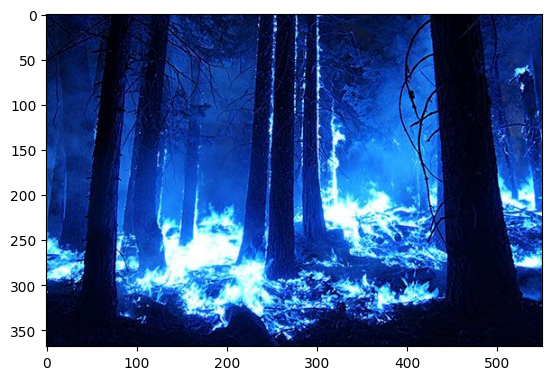

In [15]:
img = cv2.imread("1.jpg")
plt.imshow(img)
plt.show()

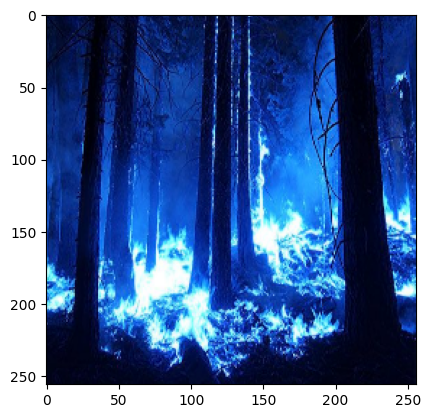

In [16]:
resize = tf.image.resize(img , (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [17]:
prediction = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 85ms/step


In [18]:
print(prediction)

[[0.9980252]]


In [19]:
if prediction >= 0.5:
    print("Fire")
else:
    print("Water")

Fire


In [20]:
print(training.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


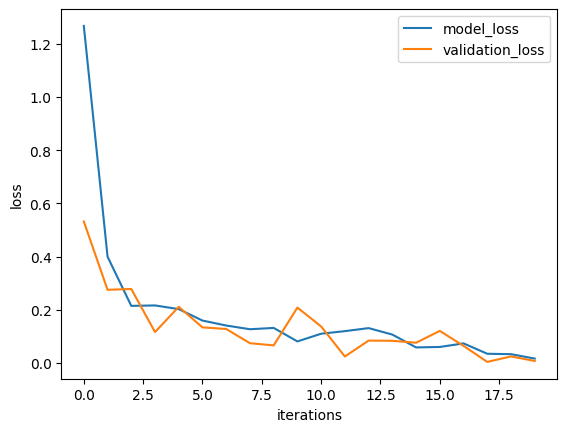

In [26]:
plt.plot(training.history['loss'] , label = "model_loss" )
plt.plot(training.history['val_loss'] , label = "validation_loss" )
plt.xlabel("iterations")
plt.ylabel("loss")
plt.legend()
plt.show()

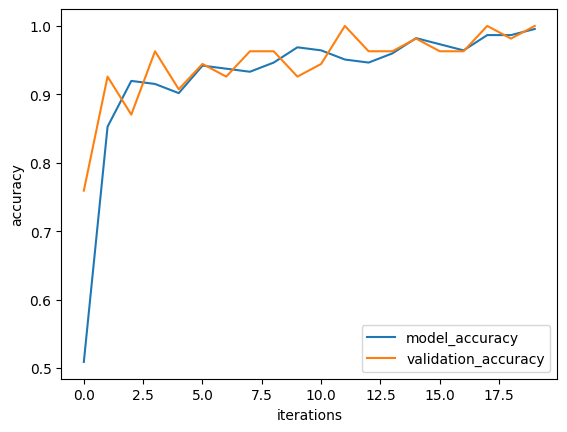

In [28]:
plt.plot(training.history['accuracy'] , label = "model_accuracy" )
plt.plot(training.history['val_accuracy'] , label = "validation_accuracy" )
plt.xlabel("iterations")
plt.ylabel("accuracy")
plt.legend()
plt.show()